In [ ]:

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
import os

In [ ]:
def get_image(image_path):
    """
    This function takes the address of the image as input and returns the pixesl values of the image
    """
    image = Image.open(image_path, "r").convert('RGB')
    image = image.resize((300 ,300))
    width, height = image.size
    pixel_values = list(image.getdata())
    if image.mode == "RGB":
        channels = 3
    elif image.mode == "L":
        channels = 1
    else:
        print("Unknown mode: %s" % image.mode)
        return None
    pixel_values = np.array(pixel_values).reshape((height, width, channels))
    return pixel_values

In [ ]:
a = []
b = []
m = {"Bacteria":0, "Normal":1, "Fungi":2, "Nematodes":3, "Virus":4}
for dirname, _, filenames in os.walk('/content/drive/MyDrive/leaf disease/Datasets'):
    for filename in filenames:
        s = str(os.path.join(dirname, filename))
        img = get_image(s)
        a.append(img)
        b.append(m[dirname.split('/')[-1]])


In [ ]:
a = np.array(a, dtype='float32')
b = np.array(b)

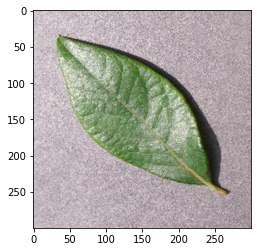

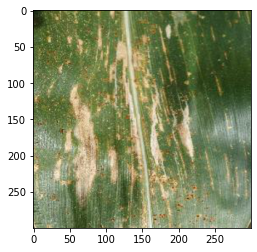

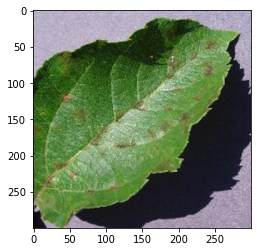

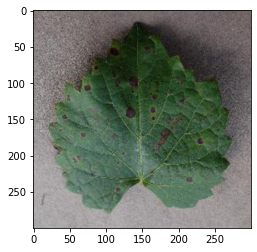

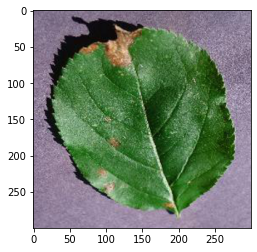

In [ ]:
for dirname, _, filenames in os.walk('/content/drive/MyDrive/leaf disease/Datasets'):
    for filename in filenames:
        s = str(os.path.join(dirname, filename))
        img = get_image(s)
        plt.imshow(img)
        plt.show()
        break

In [ ]:
from sklearn.model_selection import train_test_split
import tensorflow.keras
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras import Sequential

In [ ]:
X = a
y = b
X/=255
X_train,X_val, y_train, y_val = train_test_split(X, y, test_size=0.1)

In [ ]:
model = Sequential()
model.add(Conv2D(256, 2, 2, input_shape=X[0].shape))
model.add(Conv2D(128, 2, 2))
# model.add(MaxPool2D((2,2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(5, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 256)     3328      
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 128)       131200    
                                                                 
 flatten (Flatten)           (None, 720000)            0         
                                                                 
 dense (Dense)               (None, 256)               184320256 
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 5)                 3

In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size=5, validation_split=0.1)

Epoch 1/50
39/39 [==============================] - 133s 3s/step - loss: 15.7746 - accuracy: 0.1865 - val_loss: 2.9215 - val_accuracy: 0.4091
Epoch 2/50
39/39 [==============================] - 133s 3s/step - loss: 3.3162 - accuracy: 0.4197 - val_loss: 2.6722 - val_accuracy: 0.3182
Epoch 3/50
39/39 [==============================] - 129s 3s/step - loss: 1.3017 - accuracy: 0.6684 - val_loss: 1.1173 - val_accuracy: 0.6364
Epoch 4/50
39/39 [==============================] - 135s 3s/step - loss: 0.5131 - accuracy: 0.8290 - val_loss: 0.5255 - val_accuracy: 0.7273
Epoch 5/50
39/39 [==============================] - 131s 3s/step - loss: 0.3878 - accuracy: 0.8653 - val_loss: 0.9115 - val_accuracy: 0.7273
Epoch 6/50
39/39 [==============================] - 131s 3s/step - loss: 0.4576 - accuracy: 0.8497 - val_loss: 1.3012 - val_accuracy: 0.7273
Epoch 7/50
39/39 [==============================] - 134s 3s/step - loss: 0.1743 - accuracy: 0.9430 - val_loss: 0.6380 - val_accuracy: 0.6364
Epoch 8/50
3

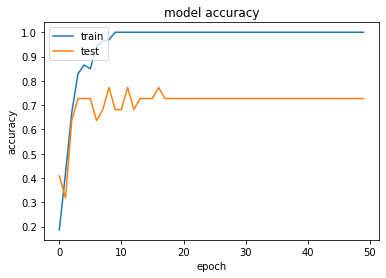

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

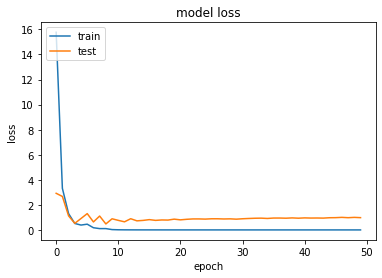

1/1 [==============================] - 1s 1s/step - loss: 0.3949 - accuracy: 0.9167


[0.3949001729488373, 0.9166666865348816]

In [ ]:

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
model.evaluate(X_val, y_val)

In [ ]:
scores = model.evaluate(X_val, y_val, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))


Accuracy: 91.67%


In [ ]:
model.save('leaf_disease_prediction model.h5')


In [ ]:
def get_image(image_path):
    """
    This function takes the address of the image as input and returns the pixesl values of the image
    """
    image = Image.open(image_path, "r").convert('RGB')
    image = image.resize((300 ,300))
    width, height = image.size
    pixel_values = list(image.getdata())
    if image.mode == "RGB":
        channels = 3
    elif image.mode == "L":
        channels = 1
    else:
        print("Unknown mode: %s" % image.mode)
        return None
    pixel_values = np.array(pixel_values).reshape((height, width, channels))
    return pixel_values

In [ ]:
imgarr = get_image("/content/Screenshot 2023-01-25 at 6.23.27 PM.png")
print(model.input_shape)
final = np.expand_dims(imgarr, axis=0)
predictions = model.predict(final)
print(predictions[0])
#class_index = np.argmax(predictions[0])
#print(class_index)

(None, 300, 300, 3)
1/1 [==============================] - 0s 167ms/step
[0. 0. 0. 0. 1.]


In [ ]:
def pred(imgg):
  imgarr = get_image(imgg)
  final = np.expand_dims(imgarr, axis=0)
  predictions = model.predict(final)
  class_index = np.argmax(predictions[0])
  if class_index == 0:
    print("The Leaf is affected by Bacteria")
  elif class_index == 1:
    print("The Leaf is Normal")
  elif class_index == 2:
    print("The Leaf is affected by Fungi")
  elif class_index == 3:
    print("The Leaf is affected by Nematodes")
  elif class_index == 4:
    print("The Leaf is affected by Virus")



In [ ]:
pred("/content/00cff577-afd4-4e36-ac9c-a52aa6ae5949___FAM_B.Rot 0508.JPG")

1/1 [==============================] - 0s 193ms/step
Nematodes
